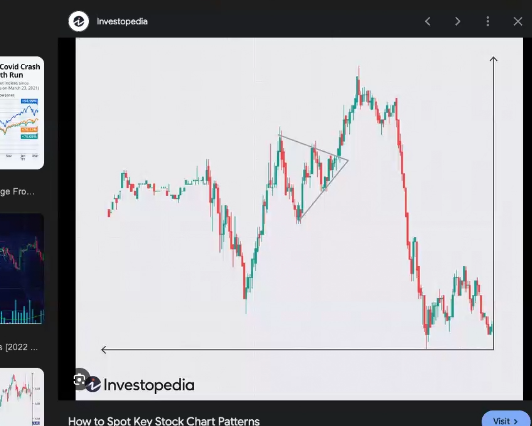

In [ ]:
#Stocks and Price Prediction Price could be High and Price could be low

In [ ]:
#X-axis is always time

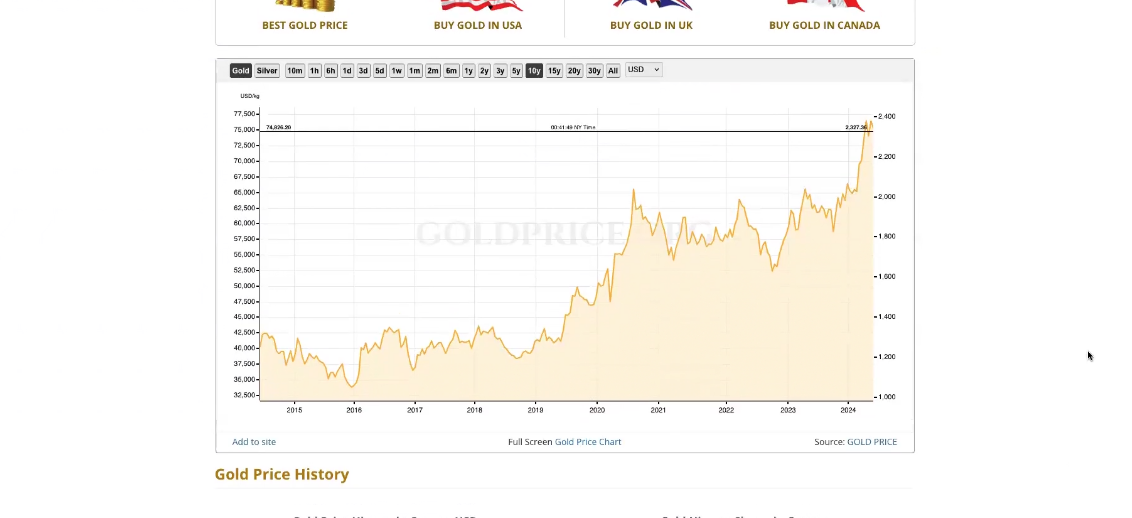

In [ ]:
#we can see the prices of gold have gone up

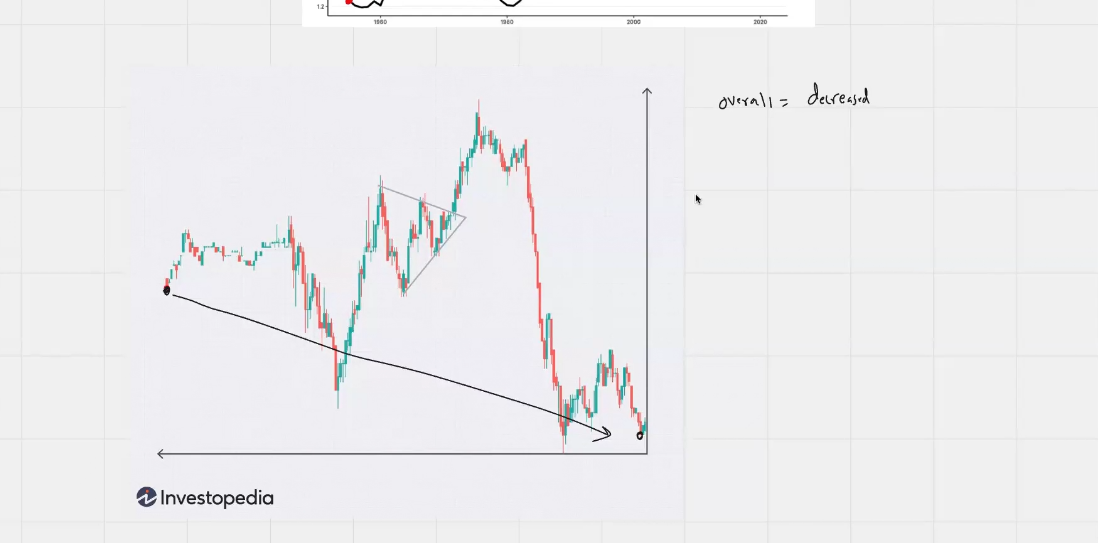

In [ ]:
#Overall the trend has decresed

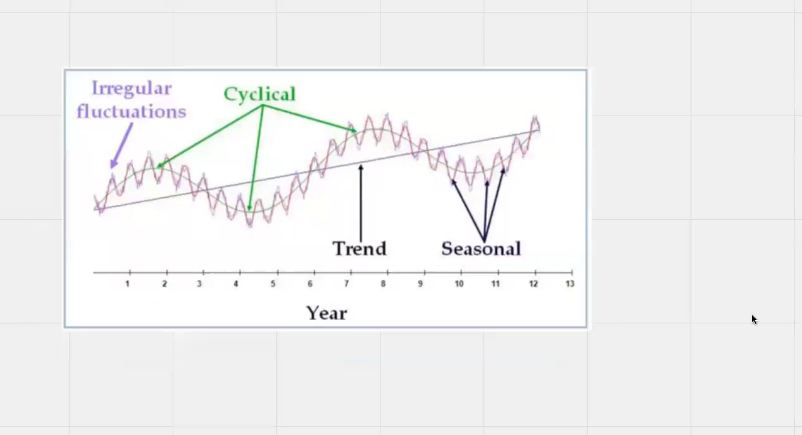

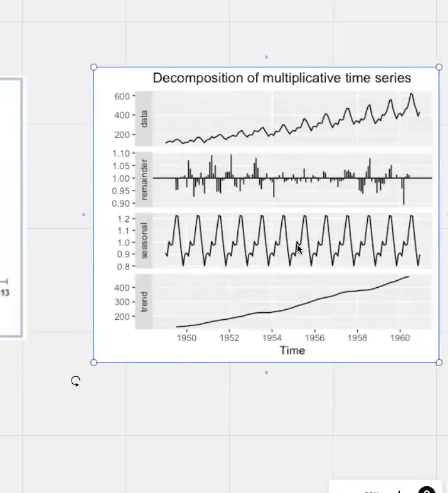

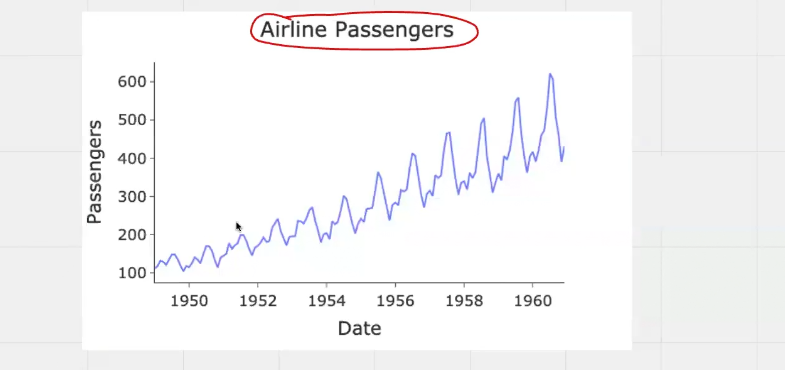

In [ ]:
#Repeating itself after a large interval of time

In [ ]:
#When some trend repeats itself again,againa and again it is called as cyclicity

In [ ]:
#cyclicity repats again and again and seasoniality happens only once

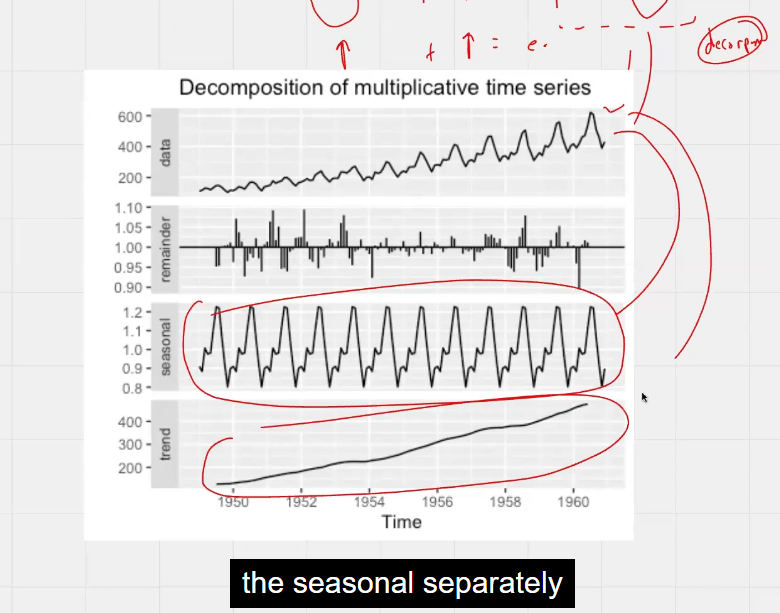

In [ ]:
#From data to seasonal we are able to extract part of the graph ,the process is called decomposition

In [ ]:
#Time Series analysis involves breaking the graph into error,trends and seasonality

In [ ]:
#we can't use the data directlyw

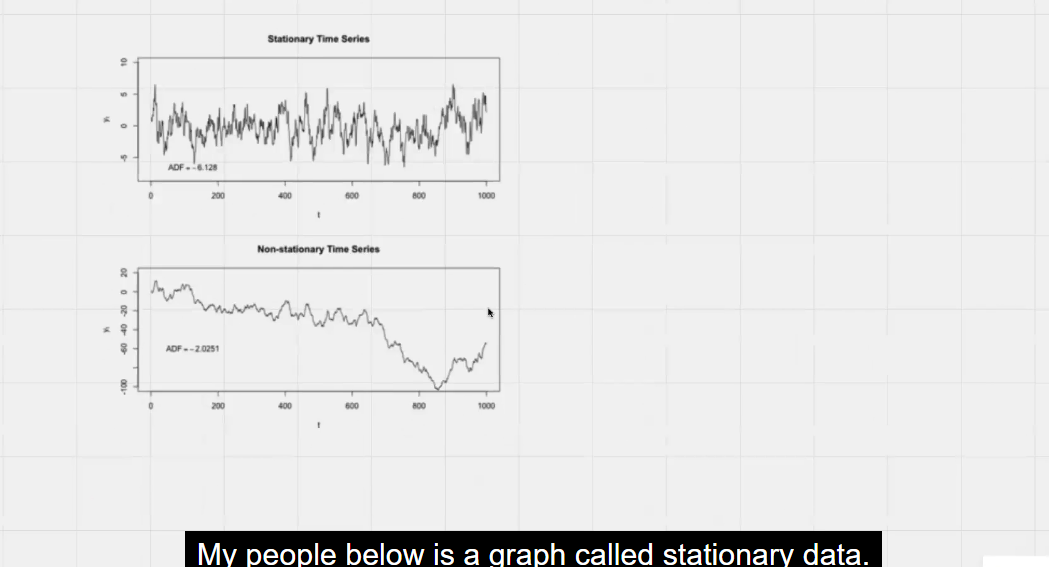

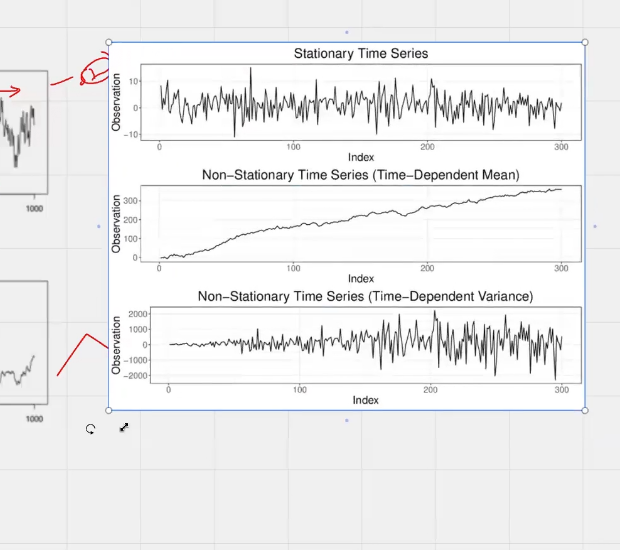

In [ ]:
#the Noise in time series data is higher ,suddenly higher and much more higher

In [ ]:
#in stationary data ,trend becomes zero and cyclicity and other information is retained

In [ ]:
#in original,non stationary state we have trend also we have seasonality,+ we have some cyclicity

In [ ]:
#can u see the data mean is same #I first want to get every mean in a standard format

In [ ]:
#farther the data point lesser  is the effect ,nearest the datapoint highest is the effect

In [ ]:
#Point one to point 4 has the higher effect than the previous data point

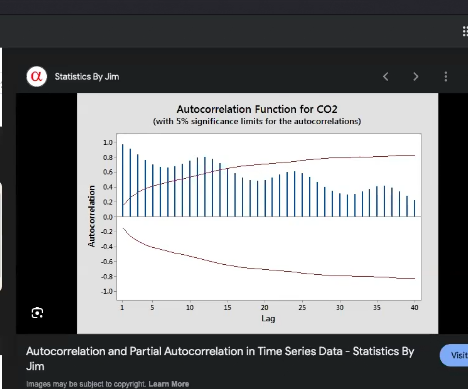

In [ ]:
#Autocorrelation graph is eventually decreasing only with time

In [ ]:
import pandas as pd
#we are working for the company called pindigo

In [ ]:
data=pd.read_csv('/content/AirPassengers.csv')

In [ ]:
data.head()
##is in the format of yymm

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
#Pindigo Airlines we are given the opportunity to work with the time series data

In [ ]:
data.describe() #descriptive ideas

#Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

In [ ]:
data['Month']=pd.to_datetime(data['Month'])

In [ ]:
data.index=data['Month']

In [ ]:
del data['Month']

In [ ]:
data.head(5)

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
#we have changed the data to one of evey month

In [ ]:
#date_str='2024-06-01'
#pd.to_datetime(date_str,format('%Y'/'%m'/'%d'))

In [ ]:
#string data gets conveted in to_date data

<Axes: xlabel='Month'>

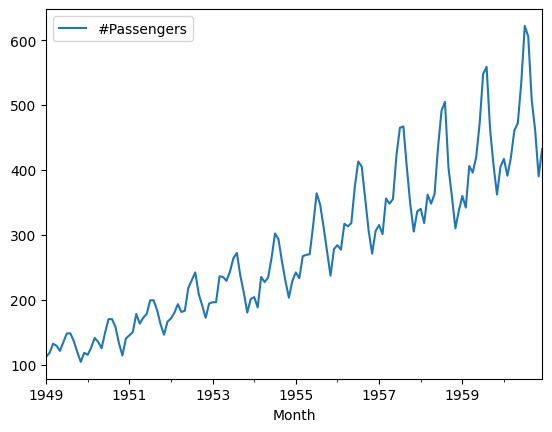

In [ ]:
data.plot() #it comes without matplotlib  #is a pandas matplotlib library

In [ ]:
#Rolling Mean

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#CALCULATING ROLLING MEAN
mean_log=data.rolling(window=4).mean()

In [ ]:
#standard deviation

In [ ]:
std_log=data.rolling(window=4).std()

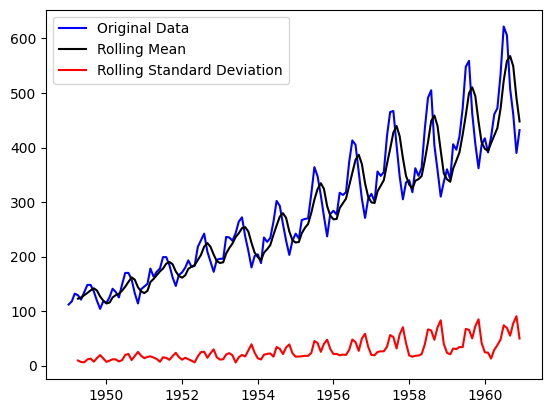

In [ ]:
plt.plot(data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')


In [ ]:
#this particluar is calculating mean and standard deviation rolling value

In [ ]:
#Higher the rolling Mean closer it gets through data

In [ ]:
#this is a no way a stationary data

In [ ]:
#This is an example of upward trend ,numeric cycle and seasonality based data

In [ ]:
#we use Augmented DickyFuller Test to test the Stationnarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Augmented DickyFuller Test
result=adfuller(data['#Passengers'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [ ]:
keys

['test_statistics',
 'p_value',
 'num_lags',
 'num_observations',
 'critical_values',
 'AIC']

In [ ]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:0.8153688792060498
p_value:0.991880243437641
num_lags:13
num_observations:130
critical_values:{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
AIC:996.692930839019


In [ ]:
#Critical values is alpha  #according to P -Value it is non stationary data

In [ ]:
import numpy as np

<Axes: xlabel='Month'>

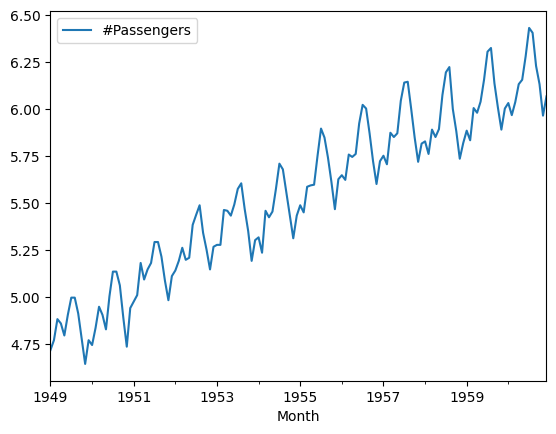

In [ ]:
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

In [ ]:
#rolling mean of transformed data
mean_log=first_log.rolling(window=12).mean()

In [ ]:
std_log=first_log.rolling(window=12).std()

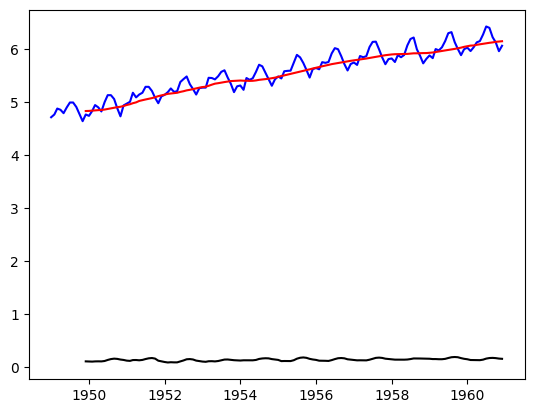

In [ ]:
plt.plot(first_log,color='blue',label='Original_data(Log)')
plt.plot(mean_log,color='red',label='Rolling_mean(Log)')
plt.plot(std_log,color='black',label='RollingStd(Log)')

In [ ]:
#After transformation things have changed in the data

In [ ]:
#Difference original data-logorithm data

In [ ]:
new_data=first_log-mean_log   #it is used to attain stationarity
new_data=new_data.dropna()
new_data.head(5)

#Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142

In [ ]:
#Augmented DickyFuller Test
result=adfuller(new_data['#Passengers'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-3.1629079913008833
p_value:0.022234630001242206
num_lags:13
num_observations:119
critical_values:{'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
AIC:-436.63269481747034


In [ ]:
#is it saying that the data is transformed

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

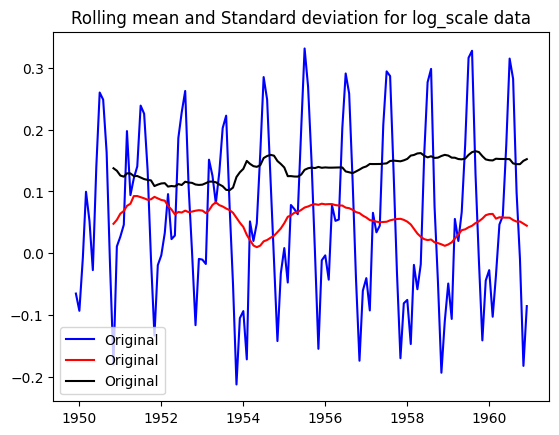

In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Original')
plt.plot(std_log,color='black',label='Original')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

#Data is somewhat stationary the mean is somewhat constant and std_dev is somewhat constant

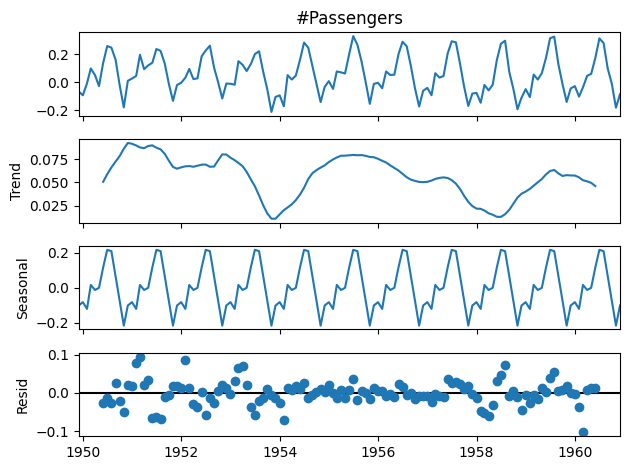

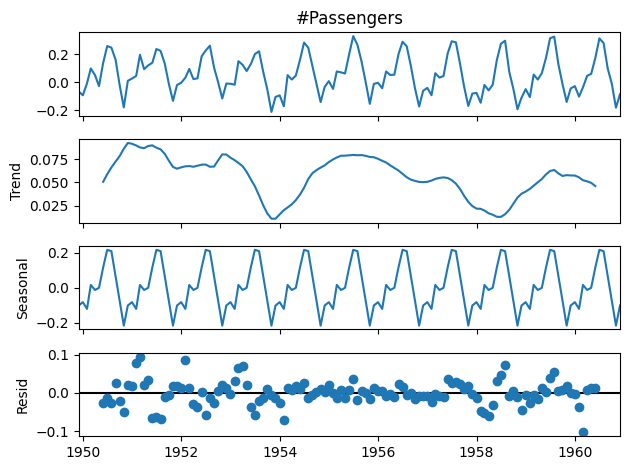

In [ ]:
#Seasonal Demposition
from statsmodels.tsa.seasonal import seasonal_decompose   #we decide and ecompose into multiple different parts
decompose_result=seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot()


In [ ]:
#trend is similar to red line i.e the rolling mean

In [ ]:
#in order to make the data stationary you can make the trend=0

In [ ]:
#ACF and PACF plot

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



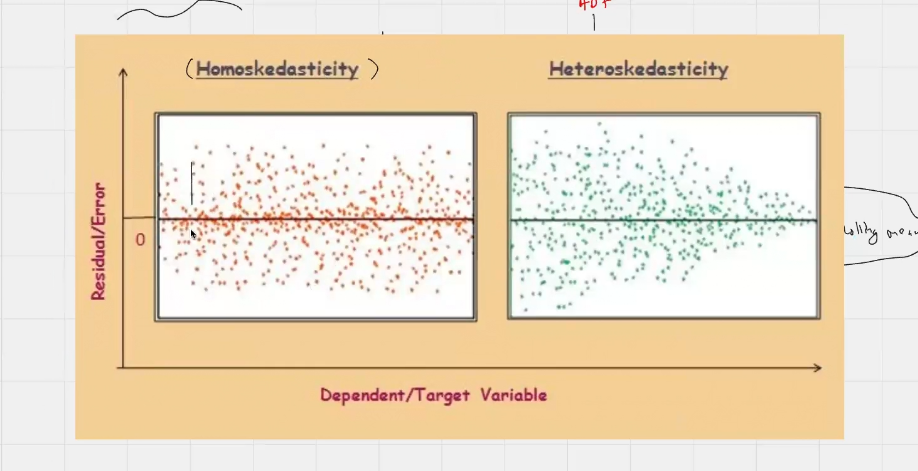

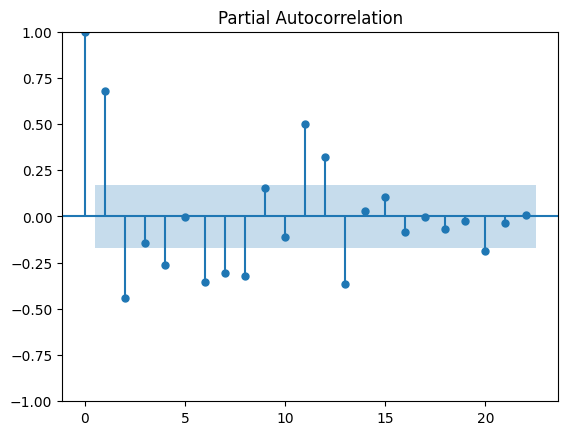

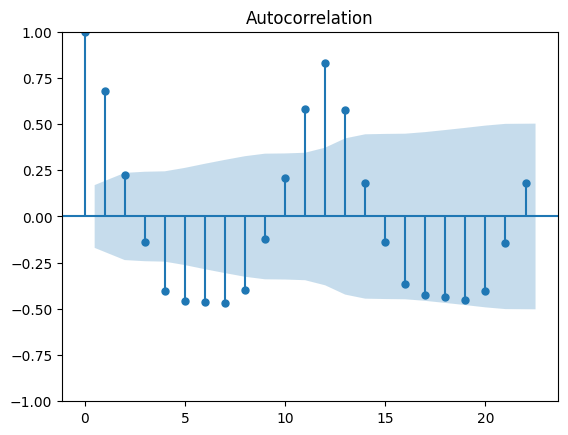

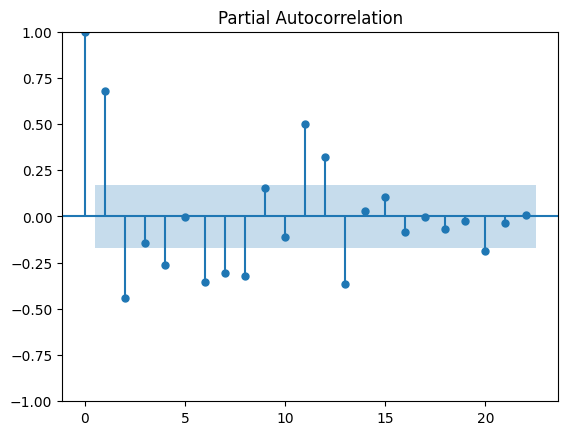

In [ ]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

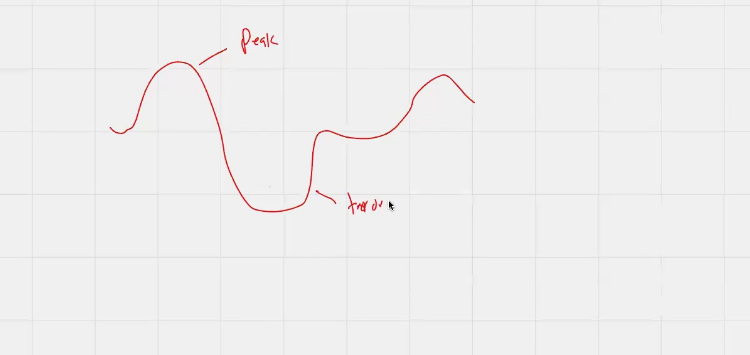

In [ ]:
#in arima what values do you have p,d,q

In [ ]:
#in one two three .after that the data goes in below range

In [ ]:
#In the equation of a wave how do we came to know which is peak and which is through

In [ ]:
#in auto correlation 10 values are outside the data  #what ranges of auto correlation

In [ ]:
#anythings that comes within is significant and anythings that comes outside is not significant

In [ ]:
#13 values are coming within the blue range and not many are coming within the blue

In [ ]:
#with acf and pacf is just for visualisation purpose and not for the  analytics purpose we can't find an new information from the plots

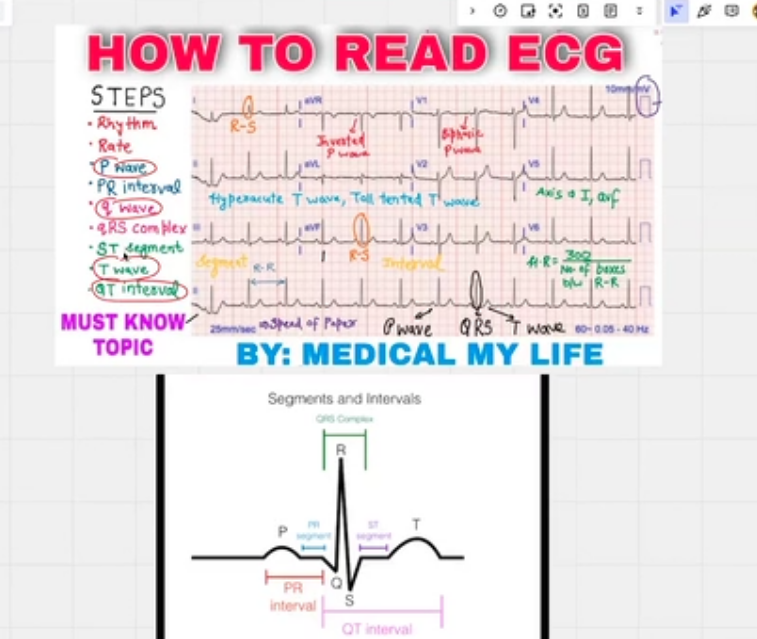

In [ ]:
#we give names like PTS because it is easy to remember and plot

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train=new_data.iloc[:120]['#Passengers']#first 120 values
test=new_data.iloc[120:]           #lst testing
#ARIMA(p,d,q)

In [ ]:
model=ARIMA(train,order=(1,0,2))      #value just before the first negative value

model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Thu, 05 Sep 2024   AIC                           -225.803
Time:                        08:00:26   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.0

<Axes: xlabel='Month'>

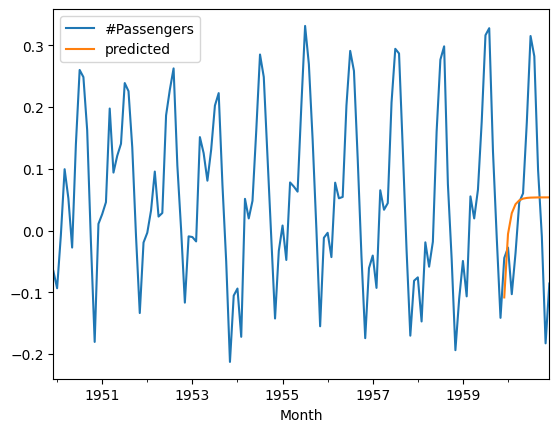

In [ ]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['#Passengers','predicted']].plot()

In [ ]:
#it is performing the worse so far!

In [ ]:
#it is giving the test-1 it is giving the last value til test-1

In [ ]:
#actual and predicted value is not correct it is givng terrible results

In [ ]:
#Arima did not do a good job

In [ ]:
#i have to give these values by myself only

In [ ]:
# I could not change anything on ARIMA neither can i anything on ARIMA

In [ ]:
#better than Arima there is a model callef Sarimax

In [ ]:
#Seasonal Average Auto Regessive integrated moving average with exo genous regresses

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#should i give auto regressive ,order of differentiation myself,moving average myself

In [ ]:
#better than ARIma there is a model called #SARIMAX

In [ ]:
#Seasonal Average,Integrated ,Moving Average with exogenous regresses

<Axes: xlabel='Month'>

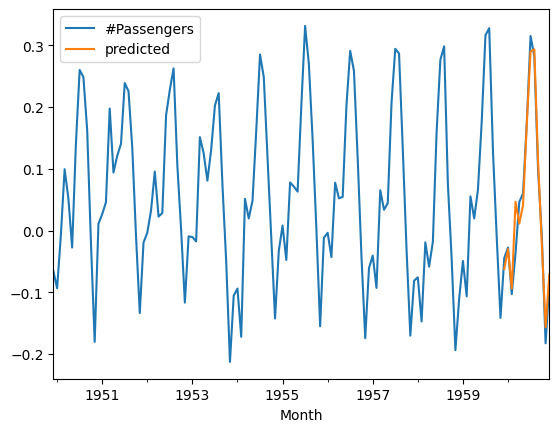

In [ ]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['#Passengers','predicted']].plot()

In [ ]:
#Unlike Arima SARIMax did a better job  how original was and how close I AM to The ARIMA

In [ ]:
#for the next five years how many people will come to the AIRLINE

In [ ]:
#WE HAVE TO MAKE PREDICTION FOR THE NEXT FIVE YEARS HOW MANY PEOPLE WILL COME TO THE AIRLINE

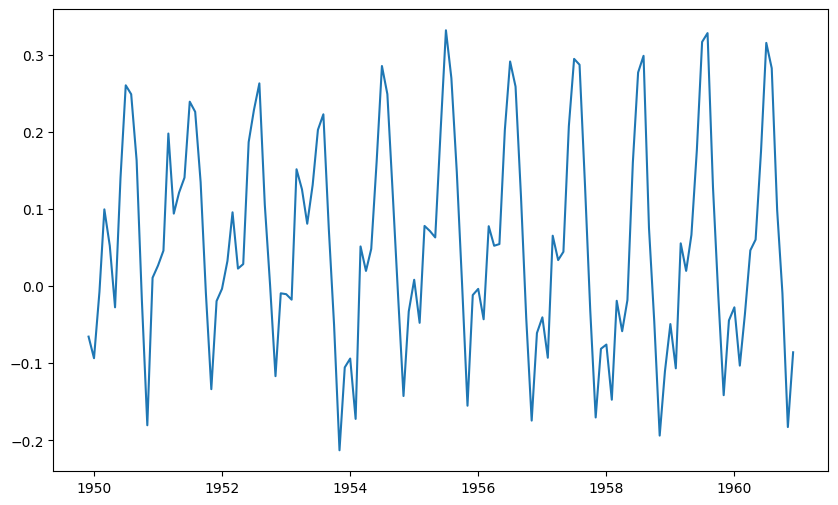

In [ ]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['#Passengers'],label='Original Data')

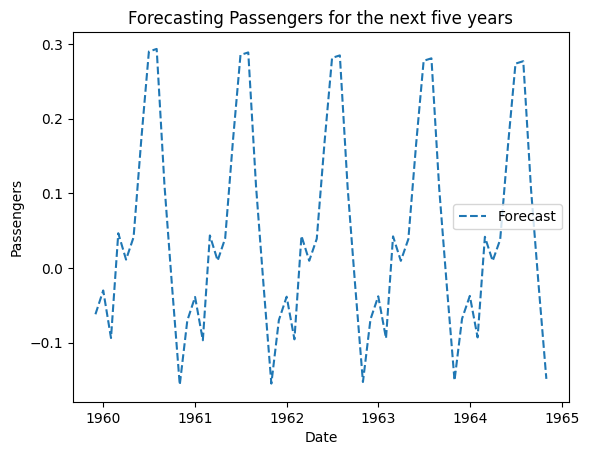

In [ ]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.title("Forecasting Passengers for the next five years")
plt.legend()

In [ ]:
#these pdq value we have  to find

In [ ]:
acf,pacf,
GridSearch(p,d,q)
#we can't  calculate  using GridSearch we can't do it directly using acf,pacf plot

In [ ]:
#How is SArimax different from arima

In [ ]:
#Unlike ARIMA ,SARIMAX does a lot of work on seasonality and all of that

In [ ]:
#focus only on order and seasonal order

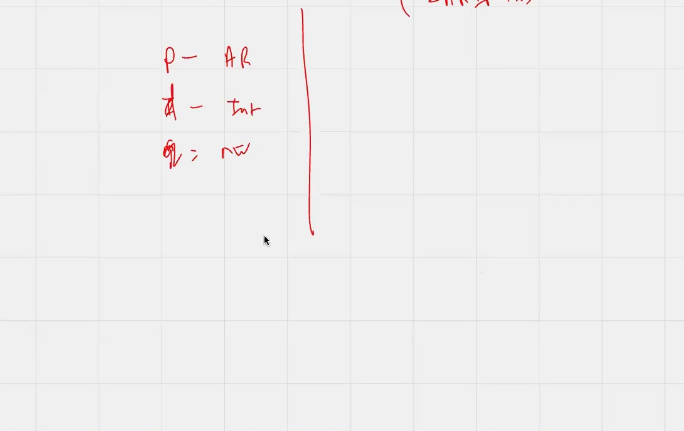

In [ ]:
#Despite of giving of order we are giving seasonal  order becuase of its granularity means we can do a lot more into it

In [ ]:
#Seasonal Ar, Seasonal Differnece in order,q=Seasonal moving Average

In [ ]:
#s=Seasonal period

In [ ]:
#p,d,q but the SARIMAX  takes another
#p=Seasonal Auto regressive part
#d=Seasonal differnece in order
#q=Seasonal moving average
#s= seasonal period

In [ ]:
#it also allows a lot more work in the granular stage p,d,q, also another  alot more at the granular stage

In [ ]:
#it is highly seasonal so prediction repeats to be seasonal

In [ ]:
#repeating the peaks multiple times so its highly seasonal so it is repeating the peaks multiple times at the seasonality

In [ ]:
#Time Series Analysis to all of you

In [ ]:
q--->ACF,p-->PACF  #we take 5 values outside the graph

In [ ]:
#from acf and pacf plot we can plot pdq

In [ ]:
#it will tkae all permutations and combinations and it will take 2,0,5

In [ ]:
#grid value will take the optimum value and exact value will take the prediction

In [ ]:
#Random Search is the fastest

In [ ]:
#m==slope and c was y intercept

In [ ]:
#Linear Regressions was implemented by ordinary least square method